This script generates the first figure in the paper "On Probabilistic Embeddings in Optimal Dimension
Reduction", by Ryan Murray and Adam Pickarski. It generates a two dimensional data set, comprised of two high density clusters and a low density ring around those clusters. We try to optimally embed this data into 1D, using metric MDS as the measure of stress or embedding fidelity. The (locally optimal) embedding learned by stock sci-kit learn code is highly oscillating, and appears to map points on the ring probabilistically. Using an analytically motivated initial guess we find a deterministic embedding with significantly improved cost. Initial seed is set for the purposes of reproducibility.

/home/rwmurray/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:319: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  warnings.warn(


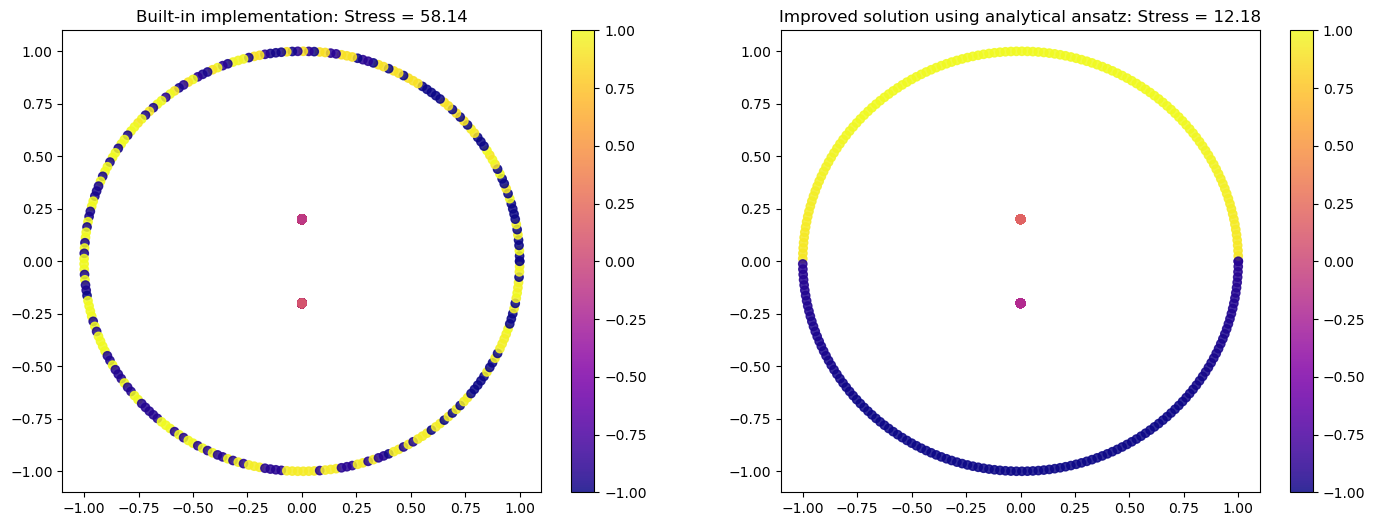

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.linalg as spla
from sklearn.manifold import MDS
import matplotlib.colors as mcolors



seed_num = 42
np.random.seed(seed_num)

# Construct dataset, 1000 points each in two clusters and 250 points distributed in a circle
k = 1000
x_data = np.zeros((2*k,2))
x_data[0:k,1] = .2
x_data[k:,1] = -.2
theta = np.linspace(0,2*np.pi, k//4)
circle_data = np.zeros((k//4,2))
circle_data[:,0] = np.cos(theta)
circle_data[:,1] = np.sin(theta)
x_data = np.vstack((x_data,circle_data))

# Analytical ansatz, leaving the two clusters alone and splitting the two halfs of the circle.
mask = x_data[:, 1] > 0
initial_guess = np.full((x_data.shape[0],1), -1)
initial_guess[mask] = 1

# Standard implementation of MDS from sci-kit learn, with default initialization.
embedding1 = MDS(n_components=1, normalized_stress='auto', random_state=seed_num)
y_random_init = embedding1.fit_transform(x_data)
stress1 = embedding1.stress_

# Principled initialization (using the ansatz above)
embedding2 = MDS(n_components=1, normalized_stress='auto', random_state=seed_num)
y_principled_init = embedding2.fit_transform(x_data, init=initial_guess)
stress2 = embedding2.stress_

# Plotting
norm = mcolors.Normalize(vmin=-1, vmax=1)
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax[0].scatter(x_data[:,0], x_data[:,1], c=y_random_init, cmap='plasma', norm=norm, alpha=0.85)
ax[0].set_title(f'Built-in implementation: Stress = {stress1/x_data.shape[0]:.2f}')
fig.colorbar(ax[0].collections[0], ax=ax[0])
ax[1].scatter(x_data[:,0], x_data[:,1], c=y_principled_init, cmap='plasma', norm=norm, alpha=0.85)
ax[1].set_title(f'Improved solution using analytical ansatz: Stress = {stress2/x_data.shape[0]:.2f}')
fig.colorbar(ax[1].collections[0], ax=ax[1])

plt.show()
